**1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)**

In [17]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization


In [18]:
from google.colab import drive
drive.mount('/content/sample_data/aiml')

Drive already mounted at /content/sample_data/aiml; to attempt to forcibly remount, call drive.mount("/content/sample_data/aiml", force_remount=True).


In [19]:
labels = pd.read_csv('/content/sample_data/aiml/My Drive/AIML/Labels.csv')
labels.groupby('Label').count()

""
Label
Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed


In [20]:
images = np.load('/content/sample_data/aiml/My Drive/AIML/images.npy')
images.shape

(4750, 128, 128, 3)

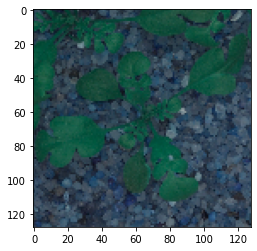

In [21]:
plt.imshow(images[1200])

4750 images of 128x128 dimensions with RGB values

**2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.**

In [22]:
#Normalizing

images = images/255



In [23]:
#Guassian blurring
blurred_images = ndimage.gaussian_filter(images, sigma=3)

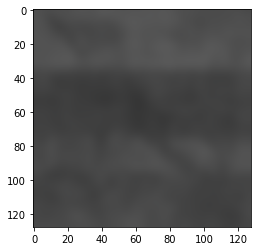

In [24]:
#Visualizing data after preprocessing
plt.imshow(blurred_images[1200])

**3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.**

In [25]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(labels)


In [26]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(blurred_images, y, test_size = 0.3, random_state=0)

**4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)**

In [28]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))


In [29]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
# compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_8 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 128)      

**5. Fit and evaluate model and print confusion matrix. (10 Marks)**

In [31]:
model.fit(x_train, y_train, batch_size=50, epochs=20, validation_data=(x_test, y_test), shuffle=True,  verbose=1)

Epoch 1/20
67/67 [==============================] - 13s 197ms/step - loss: 2.3488 - accuracy: 0.3329 - val_loss: 2.6503 - val_accuracy: 0.0856
Epoch 2/20
67/67 [==============================] - 13s 193ms/step - loss: 1.5465 - accuracy: 0.5038 - val_loss: 3.6121 - val_accuracy: 0.1305
Epoch 3/20
67/67 [==============================] - 13s 191ms/step - loss: 1.1646 - accuracy: 0.6192 - val_loss: 4.7399 - val_accuracy: 0.1305
Epoch 4/20
67/67 [==============================] - 13s 188ms/step - loss: 0.8323 - accuracy: 0.7254 - val_loss: 5.4920 - val_accuracy: 0.1305
Epoch 5/20
67/67 [==============================] - 13s 187ms/step - loss: 0.6169 - accuracy: 0.7985 - val_loss: 5.0591 - val_accuracy: 0.1305
Epoch 6/20
67/67 [==============================] - 13s 187ms/step - loss: 0.4652 - accuracy: 0.8502 - val_loss: 3.9770 - val_accuracy: 0.1804
Epoch 7/20
67/67 [==============================] - 13s 188ms/step - loss: 0.3448 - accuracy: 0.8935 - val_loss: 4.4388 - val_accuracy: 0.1207

**6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)**


In [32]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 1s 30ms/step - loss: 0.0821 - accuracy: 0.9754
Test loss: 0.0821329727768898
Test accuracy: 0.9754385948181152
